In [1]:
# Author : Ashutosh Kumar
# This file is supposed to be used for the plots :

In [ ]:
!pwd

In [2]:
!pip install -r /mnt/disks/user/project/FIDDLE-master/requirements.txt

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/ubuntu/.local/include/python3.8/UNKNOWN
sysconfig: /home/ubuntu/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install svgutils

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/ubuntu/.local/include/python3.8/UNKNOWN
sysconfig: /home/ubuntu/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [4]:
# Imports :
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import metrics, utils
from joblib import Parallel, delayed
from tqdm import tqdm#_notebook as tqdm
import scipy
import scipy.special
import itertools

import yaml
import pickle

import svgutils as svg
import scipy.sparse as sparse

data_path = '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/data/processed/'
figure_path = '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/figures/'
    
# Ashutosh suppress warnings :
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
# Some Constants :
task = 'mortality'
duration = 48.0
timestep = 1.0

In [6]:
# Function to return the object from the file in disk : 

def return_df_from_data(data_fname):
    if data_fname.endswith('.p' or '.pickle'):
        # returns dictionary :
        df_data = pd.read_pickle(data_fname)
        return df_data
    elif data_fname.endswith('.csv'):
        df_data = pd.read_csv(data_fname)
        return df_data
    elif data_fname.endswith('.npz'):
        df_data = sparse.load_npz(data_fname).todense()
        return df_data      
    else:
        raise NotImplementedError


## Time Invariant Variables Information :


In [7]:
df_test = return_df_from_data(data_path + 'formatted/invariant_data.csv')
df_test

"""
print(type(df_test))
print(df_test.info())
print(df_test.head(2))
"""
# Creating a df from the unique values of df column :
dict = df_test.variable_name.unique()
df_temp1 = pd.DataFrame.from_dict(dict)
#df_temp1.head(2)

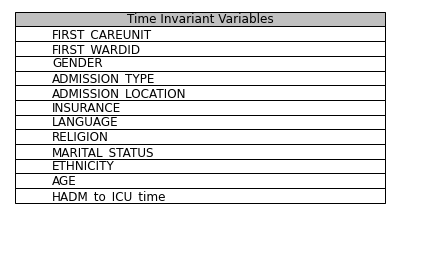

In [8]:
fig, ax = plt.subplots()
#ax.axis('off')
ax.set_axis_off()
ax.axis('tight')
#collabel = "Variables Names"
t= ax.table(cellText=df_temp1.values, colWidths = [0.9]*len(df_temp1.columns),  colLabels=["Time Invariant Variables"],  
            loc='upper left',
           cellLoc='left', colColours =["silver"] * 5)
t.auto_set_font_size(False) 
t.set_fontsize(12)
fig.tight_layout()

#ax.set_title('Time Invariant Variables', fontweight ="bold")

# save figure :
plt.savefig(figure_path + 'TimeInvVariables.png')

plt.show()

In [9]:
# Many variables are already covered in different IPYNB file and plotted so we will consider here only remaining ones :
#df_test.head(20)

In [10]:
# Insurance Information :

# condition mask
mask = df_test['variable_name'] == 'INSURANCE'
# new dataframe with selected rows
df_new = pd.DataFrame(df_test[mask])
  
#print(df_new)

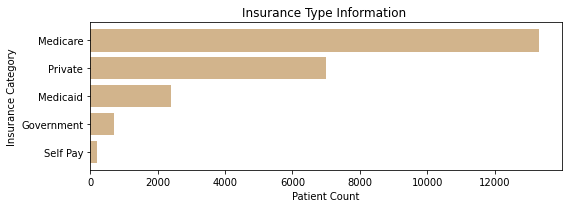

In [11]:
fig = plt.figure(figsize=(8,3))
ax = plt.subplot(111)

# b= a.groupby(['religion']).count()['row_id'].plot(kind = 'barh')
b= df_new.groupby(['variable_value']).count()['ID']
b = b.drop(b[b == 0].index).sort_values(ascending=True)
b.plot(kind = 'barh', color='tan', width=0.8)

# Use specific style :
plt.style.use('seaborn-ticks')

plt.ylabel("Insurance Category",size=10)
plt.xlabel("Patient Count",size=10)
plt.title("Insurance Type Information ",size=12)
fig.tight_layout()

# save figure :
plt.savefig(figure_path + 'InsuranceInfo.png')

plt.show()


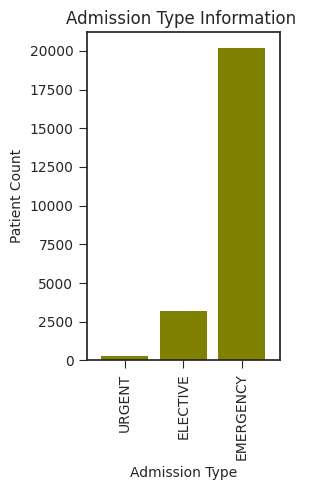

In [12]:
# Admission Types  :

# condition mask
mask = df_test['variable_name'] == 'ADMISSION_TYPE'
# new dataframe with selected rows
df_new = pd.DataFrame(df_test[mask])
  
#print(df_new)

fig = plt.figure(figsize=(3,5), dpi=100)
ax = plt.subplot(111)

# b= a.groupby(['religion']).count()['row_id'].plot(kind = 'barh')
b= df_new.groupby(['variable_value']).count()['ID']
b = b.drop(b[b == 0].index).sort_values(ascending=True)
b.plot(kind = 'bar', color='olive', width =0.8)

# Use specific style :
plt.style.use('seaborn-ticks')

plt.xlabel("Admission Type",size=10)
plt.ylabel("Patient Count",size=10)
plt.title("Admission Type Information ",size=12)

fig.tight_layout()


# save figure :
plt.savefig(figure_path + 'AdmissionTypeInfo.png')

plt.show()

## All Stays Information (Mortality vs Demographic Features):

In [13]:
data_path = '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/1_data_extraction/resources/'

df_data = return_df_from_data(data_path + '/all_stays.csv')

In [14]:
# Plotting Relation between mortality , AGE and LOS :

<Figure size 1000x1000 with 0 Axes>

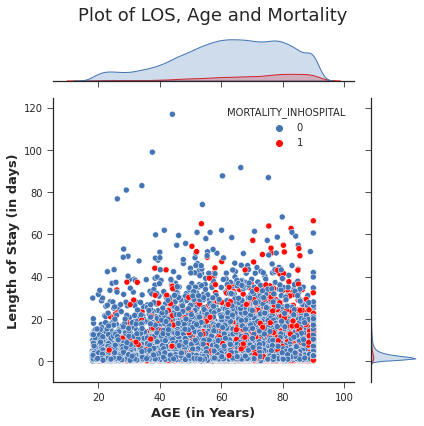

In [15]:
plt.figure(figsize = (10, 10), dpi=100)

# Create an array with the colors you want to use
colors = ["#4374B3", "#FF0B04"]
customPallete = sns.set_palette(sns.color_palette(colors))

# Joint Plot :
ax = sns.jointplot(data=df_data, x='AGE', y='LOS', hue='MORTALITY_INHOSPITAL')

# Customize the axes and title:
plt.subplots_adjust(top=0.9)
plt.suptitle('Plot of LOS, Age and Mortality', fontsize = 18)
ax.ax_joint.set_xlabel('AGE (in Years)', fontweight='bold', size = 13)
ax.ax_joint.set_ylabel('Length of Stay (in days)', fontweight='bold', size = 13)

"""
ax2 = plt.subplot(1,2,2)
# Joint PLot :
sns.jointplot(data=df_data, x='LOS', y='AGE', hue='MORTALITY_INHOSPITAL', ax= ax2)
"""

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

# save figure :
plt.savefig(figure_path + 'MortalityLOSAgeRElation.png')

plt.show()

In [16]:
# More than 13165 diagnosis options : 
df_data.DIAGNOSIS.nunique()

13165

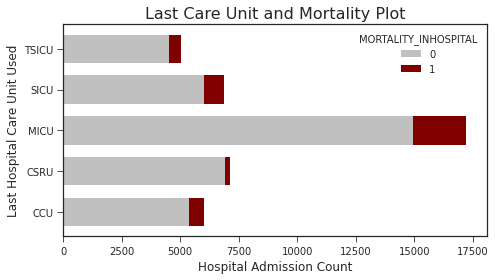

In [17]:
# Mortality vs Last Care Information :

df2 = df_data.groupby(['LAST_CAREUNIT', 'MORTALITY_INHOSPITAL'])['HADM_ID'].count().unstack('MORTALITY_INHOSPITAL').fillna(0)
colors = ['#C0C0C0', '#800000']
ax = df2[[0,1]].plot(kind='barh', stacked=True, figsize=(7, 4), color = colors, width=0.7)
ax.set_title('Last Care Unit and Mortality Plot', fontsize=16)  # or size, alternatively
ax.set_xlabel('Hospital Admission Count', fontsize=12) 
ax.set_ylabel('Last Hospital Care Unit Used', fontsize=12) 
plt.tight_layout()

# save figure :
plt.savefig(figure_path + 'LastCareMortalityPlot.png' , dpi =100)

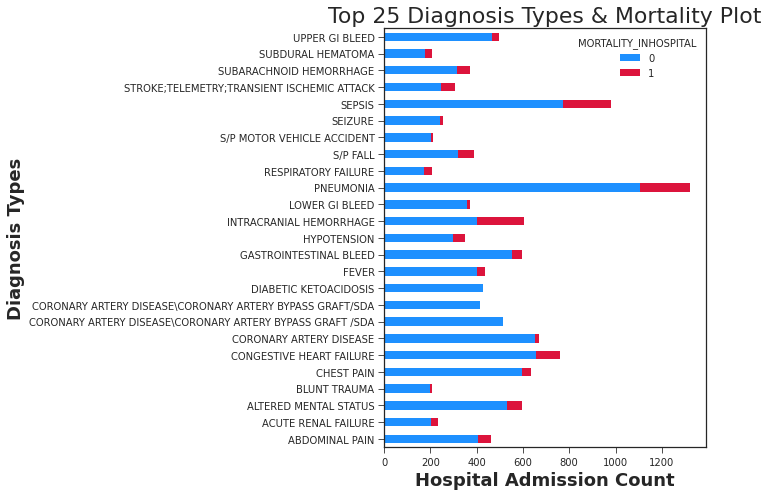

In [18]:
# Diagnosis and the Mortality Relation : 

# Top 25 diagnosis performed :
top25_diag = df_data['DIAGNOSIS'].value_counts()[:25].index.tolist()

df_diag_new = df_data.query('DIAGNOSIS in @top25_diag')

df_diag_mod = pd.crosstab(df_diag_new.DIAGNOSIS, df_diag_new.MORTALITY_INHOSPITAL)

colors = ['#1E90FF', '#DC143C']
ax = df_diag_mod[[0,1]].plot(kind='barh', stacked=True, figsize=(10, 7), color = colors)
ax.set_title('Top 25 Diagnosis Types & Mortality Plot', fontsize=22)  # or size, alternatively
ax.set_xlabel('Hospital Admission Count', fontweight='bold', fontsize=18) 
ax.set_ylabel('Diagnosis Types', fontweight='bold', fontsize=18) 
plt.tight_layout()

# save figure :
plt.savefig(figure_path + 'DiagnosisMortality.png' , dpi =90)

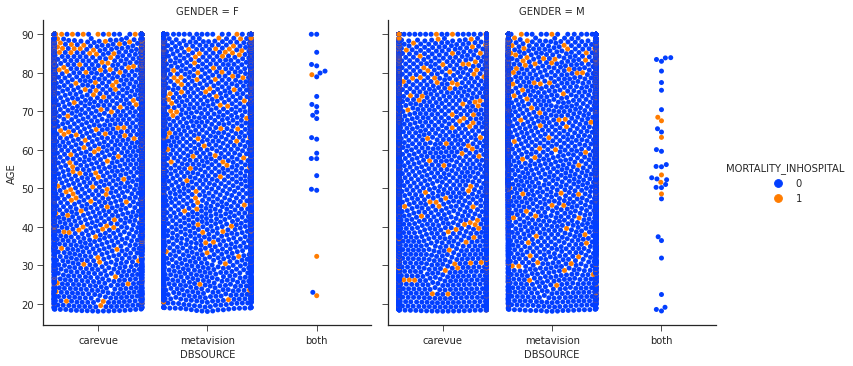

In [19]:
sns.catplot(x="DBSOURCE", y="AGE", hue="MORTALITY_INHOSPITAL",
            col="GENDER",palette = sns.color_palette("bright", 2), 
            kind="swarm", data=df_data)


# save figure :
plt.savefig(figure_path + 'MortalityAgeGenderDBsource.png' , dpi =100)

#### Pareto Chart for Important Diagnosis Categories :

In [20]:
"""
from matplotlib.ticker import PercentFormatter
dfpareto = df_data.copy()

# First filter the data where we have mortality =1 (Death outcome):
dfpareto = dfpareto[dfpareto['MORTALITY_INHOSPITAL'] == 1]

# Finding the count of unit movement across the classes :
dfpareto_1 = dfpareto[['DIAGNOSIS']]
dfpareto_1 = dfpareto.fillna('NA').groupby(['ds','class_id'])['num_units'].sum() \
                          .groupby(['ds','class_id']).max().sort_values() \
                          .groupby(['class_id']).sum().sort_values(ascending = False)

dfpareto_1_final = pd.DataFrame(dfpareto_1)
dfpareto_1_final


# More than 13165 diagnosis options : 
dfpareto_1.DIAGNOSIS.nunique()

# Plotting :
fig, ax = plt.subplots()
ax.bar(dfpareto.index, dfpareto["num_units"], color="indigo")
ax2 = ax.twinx()
ax2.plot(dfpareto.index, dfpareto["cumpercentage"], color="orangered", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="indigo")
ax2.tick_params(axis="y", colors="orangered")
plt.show()

"""

'\nfrom matplotlib.ticker import PercentFormatter\ndfpareto = df_data.copy()\n\n# First filter the data where we have mortality =1 (Death outcome):\ndfpareto = dfpareto[dfpareto[\'MORTALITY_INHOSPITAL\'] == 1]\n\n# Finding the count of unit movement across the classes :\ndfpareto_1 = dfpareto[[\'DIAGNOSIS\']]\ndfpareto_1 = dfpareto.fillna(\'NA\').groupby([\'ds\',\'class_id\'])[\'num_units\'].sum()                           .groupby([\'ds\',\'class_id\']).max().sort_values()                           .groupby([\'class_id\']).sum().sort_values(ascending = False)\n\ndfpareto_1_final = pd.DataFrame(dfpareto_1)\ndfpareto_1_final\n\n\n# More than 13165 diagnosis options : \ndfpareto_1.DIAGNOSIS.nunique()\n\n# Plotting :\nfig, ax = plt.subplots()\nax.bar(dfpareto.index, dfpareto["num_units"], color="indigo")\nax2 = ax.twinx()\nax2.plot(dfpareto.index, dfpareto["cumpercentage"], color="orangered", marker="D", ms=7)\nax2.yaxis.set_major_formatter(PercentFormatter())\n\nax.tick_params(axis="y", 

### Final formatted input features :



In [21]:
# Reading the pickle file : 
data_path = '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/data/processed/'
df_input_features = return_df_from_data(data_path + '/features/benchmark,outcome=mortality,T=48.0,dt=1.0/input_data.p')

type(df_input_features)

pandas.core.frame.DataFrame

In [22]:
# Find out the time-series features only based if t is NaN :

df_input_features = df_input_features.dropna(subset=['t'])
df_input_features.head()

,ID,t,variable_name,variable_value
12,200001,0.013333,220210,22.0
13,200001,0.030000,220179,113.0
14,200001,0.030000,220180,65.0
15,200001,0.030000,220181,77.0
16,200001,0.130000,220277,94.0


In [23]:
# 5609 time-dependent features are present :
df_input_features.variable_name.nunique()

5609

### Rare features which were dropped : 

In [24]:
### Find out the Rare features that are dropped in pre-filter stage : 
data_path= '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/data/processed/output'

df_prefilter_removed_features = return_df_from_data(data_path + '/pre-filtered.csv')
df_prefilter_removed_features.head()

,ID,t,variable_name,variable_value
0,200001,NaN,ADMISSION_LOCATION,CLINIC REFERRAL/PREMATURE
1,200001,NaN,ADMISSION_TYPE,EMERGENCY
2,200001,NaN,AGE,61.10958904109589
3,200001,NaN,ETHNICITY,ASIAN - ASIAN INDIAN
4,200001,NaN,FIRST_CAREUNIT,MICU


In [25]:
df_prefilter_removed_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33661004 entries, 0 to 33661003
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   t               float64
 2   variable_name   object 
 3   variable_value  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ GB


In [26]:
# So , total 3894 features were retained in the study out of 5609 features 
df_prefilter_removed_features.variable_name.nunique()

3894

In [27]:
# Features which were dropped :
# df_result = df_input_features[~df_input_features.isin(df_prefilter_removed_features)].dropna(inplace=True)
#result_df = pd.merge(df_input_features,df_prefilter_removed_features, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

#df_excluded_df = df_input_features.merge(df_prefilter_removed_features, how='left', indicator='ind').query('ind=="left_only"')
#df_excluded_df.head()

In [28]:
# https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [29]:
# Update the dtype of the mixed to numeric :
df_input_features['variable_value'] = pd.to_numeric(df_input_features['variable_value'], errors='coerce')

In [30]:
df_input_features.tail()

,ID,t,variable_name,variable_value
46945548,299957,47.845276,227756,NaN
46945549,299957,47.845276,227780,NaN
46945550,299957,47.845278,224279,NaN
46945551,299957,47.845278,224280,NaN
46945552,299957,47.845278,227790,NaN


In [31]:
# So , total 3894 features were retained in the study out of 5609 features 
df_input_features.variable_name.nunique()

5609

In [32]:
df_input_features = df_input_features[df_input_features['variable_value'].notna()]
df_input_features.variable_name.nunique()

4563

In [33]:
# There are 4563 numeric variables present.. 

In [34]:
!pip install --user npzviewer

     |████████████████████████████████| 8.3 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 332 kB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 59.9 MB 163 kB/s  eta 0:00:01
  Created wheel for npzviewer: filename=npzviewer-0.2.0-py3-none-any.whl size=5605 sha256=126d63879dcaf3eac7a60d48148578a203872e6dc52ecc269495bc60052416ad
  Stored in directory: /home/ubuntu/.cache/pip/wheels/34/6b/8f/4f60399ee16f5a8e70cfda6e7a6b62210c877949176b4e1895
Successfully built npzviewer
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
distutils: /home/ubuntu/.local/include/python3.8/UNKNOWN
sysconfig: /home/ubuntu/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


## Reading Prediction Model Output:

In [35]:
data_path= '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/data/processed/output/outcome=mortality.T=48.0.dt=1.0'

# Load data 
data = np.load(data_path + '/RF.test.npz')
print(data.files)

#features_S_npzFIDDLE_experiments-master/mimic3_experiments/data/processed/output/outcome=mortality.T=48.0.dt=1.0 = return_df_from_data(data_path + '/S.npz')

['y_score', 'y_true']


In [6]:
import numpy as np
data_path= '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/data/processed/output/'

data = np.load(data_path + '/X.npz')
print(data.files)

# Load data 

['data', 'shape', 'fill_value', 'coords']


In [8]:
data['data']

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
data['y_true']

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [37]:
data['y_score']

array([0.13172675, 0.20774882, 0.03871397, ..., 0.07185164, 0.04911745,
       0.10947303])

In [38]:
data = np.load(data_path + '/RNN_V2.test.npz', allow_pickle=True)
lst = data.files

for item in lst:
    print(item)
    print(data[item])

y_score
[[0.00448957]
 [0.54966754]
 [0.00352371]
 ...
 [0.00204321]
 [0.00300742]
 [0.29254287]]
y_true
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [39]:
print(type(data['y_score']))

<class 'numpy.ndarray'>


## Understanding the selected MIMIC-III Cohort :

In [40]:
data_path = '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/data/processed/'
cohort_df = return_df_from_data(data_path + 'population/pop.mortality_benchmark.csv')
cohort_df.head()

,ID,stay,partition,mortality_LABEL,y_true
0,200001,55973_episode6_timeseries.csv,train,0,0
1,200028,41710_episode1_timeseries.csv,train,0,0
2,200033,56369_episode1_timeseries.csv,train,1,1
3,200034,98276_episode1_timeseries.csv,train,0,0
4,200053,78895_episode1_timeseries.csv,train,0,0


In [41]:
# Count : 
df_count=cohort_df.groupby('y_true')['ID'].count()
df_count

y_true
0    7546
1    1031
Name: ID, dtype: int64

In [42]:
# Percenatge : 

df_percenatge=cohort_df.groupby('y_true')['ID'].count().rename("percentage").transform(lambda x: x/x.sum())
df_percenatge

y_true
0    0.879795
1    0.120205
Name: percentage, dtype: float64

In [43]:
# Variable info for cohort :

# condition mask
mask = df_test['variable_name'] == 'ADMISSION_LOCATION'
# new dataframe with selected rows
df_new = pd.DataFrame(df_test[mask])
 
#print(df_new)

In [44]:
# Find count : 
b= df_new.groupby(['variable_value']).count()['ID']
b

variable_value
CLINIC REFERRAL/PREMATURE    9247
EMERGENCY ROOM ADMIT         7216
PHYS REFERRAL/NORMAL DELI    3771
TRANSFER FROM HOSP/EXTRAM    3261
TRANSFER FROM OTHER HEALT      40
TRANSFER FROM SKILLED NUR      80
TRSF WITHIN THIS FACILITY       5
Name: ID, dtype: int64

In [45]:
df_new.describe()

,ID,t
count,23620.000000,0.0
mean,250207.223666,NaN
std,28867.263873,NaN
min,200001.000000,NaN
25%,225249.250000,NaN
50%,250384.500000,NaN
75%,275170.750000,NaN
max,299998.000000,NaN


In [46]:
# Frequent variables :

### Find out the Rare features that are dropped in pre-filter stage : 
data_path= '/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/data/processed/output'

df_prefilter_removed_features = return_df_from_data(data_path + '/pre-filtered.csv')
df_prefilter_removed_features.head()

,ID,t,variable_name,variable_value
0,200001,NaN,ADMISSION_LOCATION,CLINIC REFERRAL/PREMATURE
1,200001,NaN,ADMISSION_TYPE,EMERGENCY
2,200001,NaN,AGE,61.10958904109589
3,200001,NaN,ETHNICITY,ASIAN - ASIAN INDIAN
4,200001,NaN,FIRST_CAREUNIT,MICU


In [47]:
rslt_df = df_prefilter_removed_features.loc[df_prefilter_removed_features['variable_name'] == '220045']
rslt_df.tail(10)

,ID,t,variable_name,variable_value
33659705,299956,38.351665,220045,104.0
33659807,299956,39.351665,220045,87.0
33659872,299956,40.351665,220045,87.0
33660114,299956,41.351665,220045,88.0
33660231,299956,42.351665,220045,81.0
33660320,299956,43.351665,220045,80.0
33660452,299956,44.351665,220045,83.0
33660762,299956,45.351665,220045,75.0
33660814,299956,46.351665,220045,79.0
33660897,299956,47.351665,220045,83.0


## Feature Dimensions :

In [48]:
#import pandas as pd
#data = {'Time Dependent Variables': [7323], 'Time Invariant Varaibles': [84]}
#df = pd.DataFrame.from_dict(data, orient='index', columns=['Mortality, 48h'])

data = {'Mortality, 48h' : [7323, 94]}
df = pd.DataFrame.from_dict(data, orient='index', columns=['Time Dependent Variables', 'Time Invariant Variables'])
df.head()

,Time Dependent Variables,Time Invariant Variables
"Mortality, 48h",7323,94


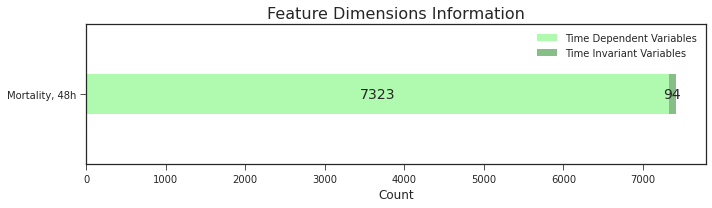

In [49]:
#plt.figure (figsize = (9,2))
#df.plot(kind = 'barh', stacked = True)

colors = ['#AFFAAF', '#85BF85']
ax = df.plot(kind='barh', stacked=True, figsize=(10, 3), color = colors,  width=0.2, sharex=True, sharey=True)

ax.set_title('Feature Dimensions Information', fontsize=16)  # or size, alternatively
ax.set_xlabel('Count', fontsize=12) 
#ax.set_ylabel('Last Hospital Care Unit Used', fontsize=12) 
plt.tight_layout()

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{width:.0f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=14)

# save figure :
plt.savefig(figure_path + 'FeatureDimension.png' , dpi =100)


plt.show()


### Best search space for the optimum prediction:



In [50]:
#df_cnn_temp = pd.read_csv("/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/3_ML_models/log/df_search.current.model=CNN_V3.outcome=mortality.T=48.0.dt=1.0.csv")
#FIDDLE_experiments-master/mimic3_experiments/3_ML_models/log/df_search.current.model=CNN_V3.outcome=mortality.T=48.0.dt=1.0.csv

df_cnn_best = pd.read_csv("/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/3_ML_models/log/df_search.current.model=CNN_V3.outcome=mortality.T=48.0.dt=1.0.csv",
                usecols=['best_score','best_iter', 'seed', 'batch_size', 'lr',
       'dropout', 'depth', 'filter_size', 'n_filters', 'n_neurons',
       'activation'] )

df_cnn_best = df_cnn_best.sort_values(['best_score'], ascending=[False])
df_cnn_best = df_cnn_best.head(1)
df_cnn_best

,best_score,best_iter,seed,batch_size,lr,dropout,depth,filter_size,n_filters,n_neurons,activation
39,0.883873,1000,0,16,0.0001,0.4,1,4,16,128,relu


In [51]:
df_rnn_best = pd.read_csv("/mnt/disks/user/project/FIDDLE_experiments-master/mimic3_experiments/3_ML_models/log/df_search.current.model=RNN_V2.outcome=mortality.T=48.0.dt=1.0.csv",
                usecols=['best_score','best_iter', 'seed', 'batch_size', 'lr',
       'dropout', 'num_layers', 'hidden_size', 'n_neurons', 'activation'] )

df_rnn_best = df_rnn_best.sort_values(['best_score'], ascending=[False])
df_rnn_best = df_rnn_best.head(1)
df_rnn_best

,best_score,best_iter,seed,batch_size,lr,dropout,num_layers,hidden_size,n_neurons,activation
34,0.885049,1500,0,16,0.0001,0.8,1,128,64,relu


In [52]:
df_rnn_best.reset_index(drop=True, inplace=True)
df_cnn_best.reset_index(drop=True, inplace=True)

In [53]:
# Saving the results as the html file : 
df_rnn_best.to_html(figure_path + 'RNN_search_best.html')
df_cnn_best.to_html(figure_path + 'CNN_search_best.html')